# Demonstração: Importância dos recursos em uma Árvore de decisão

Começaremos com a leitura do conjunto de dados de aceitabilidade de automóveis.

In [2]:
import pandas as pd
df = pd.read_csv('cars.csv') # Revisar o path
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Desta vez, vamos codificar os recursos usando um esquema de codificação One Hot, isto é, vamos considerá-los como variáveis categóricas.

Como Scikit-Learn não entende strings, apenas números, também precisaremos atribuir números às tags. Para isso, usaremos o ‘LabelEncoder’.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))
X.iloc[:,0:8].head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1


Vamos treinar uma árvore de decisão em todo o conjunto de dados (neste momento, vamos ignorar o superajuste). Também vamos limitar a árvore artificialmente para que seja pequena e possamos visualizá-la.

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, random_state = 11)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

Agora visualizemos a árvore usando o exportador de graphviz. Completar o que está faltando

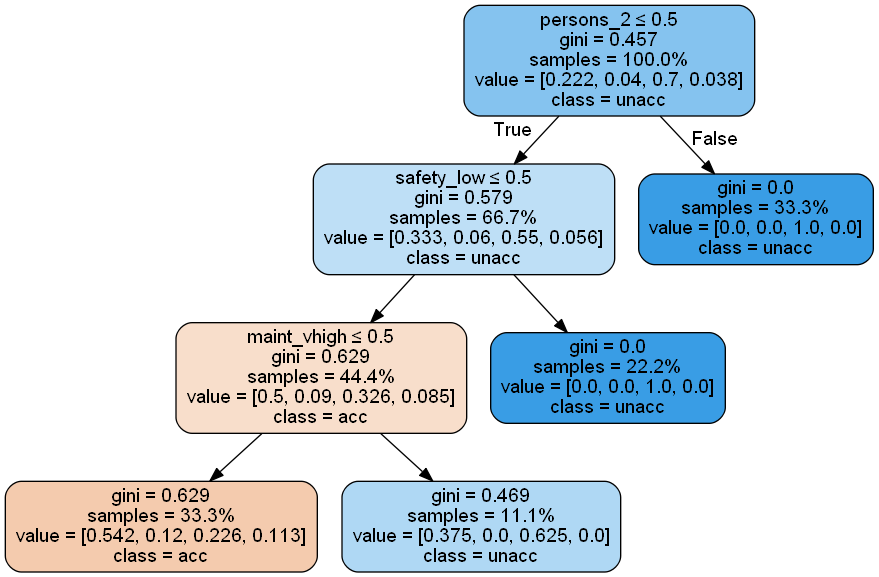

In [5]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt, out_file=None,  
feature_names=X.columns,class_names=le.classes_,filled=True, rounded=True,proportion=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Vamos traçar o índice de Gini para várias proporções em uma classificação binária:

Text(0,0.5,'Índice de Gini')

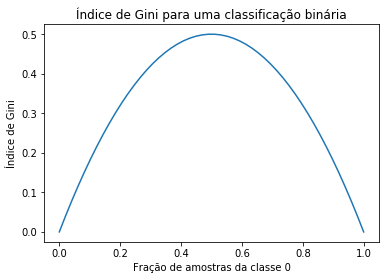

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C0 = np.linspace(0,1)
C1 = 1.0 - C0

gini = 1 - ( C0**2 + C1**2 )

plt.plot(C0, gini)
plt.title('Índice de Gini para uma classificação binária')
plt.xlabel('Fração de amostras da classe 0')
plt.ylabel('Índice de Gini')

Aqui, vamos verificar o cálculo do índice de Gini no nó raiz da árvore acima:

In [11]:
quantidade_ocorrências_classes = pd.Series(y).value_counts()
total_observações = sum( quantidade_ocorrências_classes )

proporções_classes = quantidade_ocorrências_classes / total_observações

print ("Proporções Classes")
print (proporções_classes)

gini = 1 - sum( proporções_classes ** 2 )
print ("Gini: ",gini)


Proporções Classes
2    0.700231
0    0.222222
1    0.039931
3    0.037616
dtype: float64
Gini:  0.4572837630744171


Agora vamos ver a importância dos recursos da árvore gerada.
Para o qual utilizaremos feature\_importances\_

In [8]:
importância_features = pd.DataFrame(dt.feature_importances_,
    index = X.columns,
    columns=['importância']).sort_values('importância',
        ascending=False)
importância_features.head()

,importância
safety_low,0.545239
persons_2,0.363493
maint_vhigh,0.091268
buying_high,0.000000
doors_5more,0.000000


Agora vamos verificar o cálculo da importância.

In [14]:
gini_persons_2 = 1.000 * 0.4573 - 0.667 * 0.5792 - 0.333 * 0.0000
gini_safety_low = 0.666 * 0.5792 - 0.444 * 0.6288 - 0.222 * 0.0000
gini_buying_vhigh = 0.444 * 0.6288 - 0.333 * 0.6286 - 0.111 * 0.4688

norm = gini_persons_2 + gini_safety_low + gini_buying_vhigh

print ("persons_2:", gini_persons_2 / norm)
print ("safety_low:", gini_safety_low / norm)
print ("buying_vhigh:", gini_buying_vhigh / norm)

persons_2: 0.3632961063717171
safety_low: 0.5454539870454681
buying_vhigh: 0.09124990658281469
